In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import matplotlib as mpl

Using TensorFlow backend.


### Function for Generating Synthetic Data which will be fed to a Time Series Model (RNN) for training.

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1,freq2,offsets1, offsets2 = np.random.rand(4, batch_size,1)
    time = np.linspace(0,1,n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[...,np.newaxis].astype(np.float32)

### Function for plotting the Learning Curve based on the training of the model.

In [3]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

In [5]:
np.random.seed(42)
n_steps = 50
series = generate_time_series(10000,n_steps + 1)

In [6]:
x_train , y_train = series[:7000,:n_steps], series[:7000,-1]
x_valid , y_valid = series[7000:9000,:n_steps], series[7000:9000,-1]
x_test , y_test = series[9000:,:n_steps], series[9000:,-1]

A small sample of the synthetic data generated by the above defined functions.

In [7]:
x_train[0]

array([[ 0.4596948 ],
       [ 0.31486678],
       [ 0.12497123],
       [-0.1039134 ],
       [-0.33817387],
       [-0.53167135],
       [-0.65472883],
       [-0.6680997 ],
       [-0.6068115 ],
       [-0.50168324],
       [-0.27951923],
       [-0.15070675],
       [ 0.01001816],
       [ 0.11860766],
       [ 0.09566415],
       [ 0.1479297 ],
       [ 0.16850619],
       [ 0.19524719],
       [ 0.22094081],
       [ 0.38448656],
       [ 0.4021102 ],
       [ 0.5566975 ],
       [ 0.55000687],
       [ 0.47437248],
       [ 0.29733396],
       [ 0.13306592],
       [-0.1292547 ],
       [-0.36367297],
       [-0.49515054],
       [-0.65279794],
       [-0.6665792 ],
       [-0.5604573 ],
       [-0.50344354],
       [-0.28775147],
       [-0.12684062],
       [-0.0095053 ],
       [ 0.12024356],
       [ 0.18013756],
       [ 0.1559989 ],
       [ 0.1756968 ],
       [ 0.217454  ],
       [ 0.30272725],
       [ 0.38143268],
       [ 0.42323437],
       [ 0.46800318],
       [ 0

In [8]:
y_train[0]

array([-0.35489398], dtype=float32)

Shapes for train, validation and test sets.

In [9]:
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(7000, 50, 1) (7000, 1)
(2000, 50, 1) (2000, 1)
(1000, 50, 1) (1000, 1)


### Ploting the synthetic data.

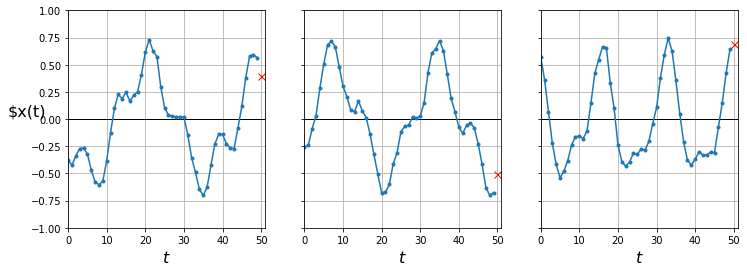

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [31]:
def plot_series(series,y=None,y_pred = None,x_label="$t$",y_label="$x(t)$"):
  plt.plot(series,".-")
  if y is not None:
    plt.plot(n_steps,y,"rx",markersize=7)
  if y_pred is not None:
    plt.plot(n_steps, y_pred,"go")
  plt.grid(True)
  if x_label:
    plt.xlabel(x_label, fontsize=16)
  if y_label:
    plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.hlines(0,0, 100, linewidth=1)
  plt.axis([0, n_steps + 1,-1,1])
  plt.figure(figsize=(12,4))
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4))
for col in range(3):
  plt.sca(axes[col])
  plot_series(x_valid[col,:,0],y_valid[col,0],
              y_label=("$x(t)" if col==0 else None))
  

plt.show()

A prediction based on mean value for the synthetic data.

In [11]:
y_pred_1 = x_valid[:, -1]
print(np.mean(keras.losses.mean_squared_error(y_valid,y_pred_1)))


0.020211367


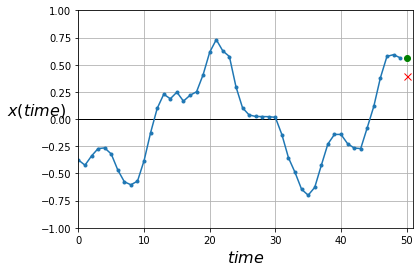

<Figure size 864x288 with 0 Axes>

In [12]:
plot_series(x_valid[0,:,0], y_valid[0,0], y_pred_1[0,0])
plt.show()

# Simple RNN for a single prediction.

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
        keras.layers.SimpleRNN(1, input_shape=[None,1])    
])

optimizer = keras.optimizers.Adam(lr=0.007)
model.compile(loss="mse",optimizer=optimizer)
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid,y_valid))



Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.1026 - val_loss: 0.0271
Epoch 2/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0228 - val_loss: 0.0193
Epoch 3/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0174 - val_loss: 0.0153
Epoch 4/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0144 - val_loss: 0.0131
Epoch 5/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0128 - val_loss: 0.0119
Epoch 6/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0120 - val_loss: 0.0112
Epoch 7/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0116 - val_loss: 0.0110
Epoch 8/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 9/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 10/20
7000/7000 [==

In [15]:
model.evaluate(x_valid,y_valid)

2000/2000 [==============================] - 0s 184us/step


0.010897594466805459

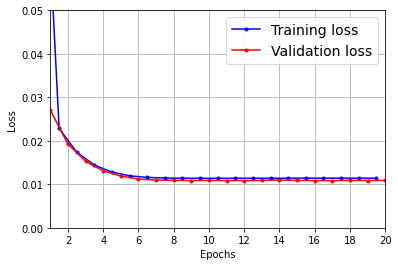

In [17]:
plot_learning_curves(model.history.history["loss"],model.history.history["val_loss"])
plt.show()

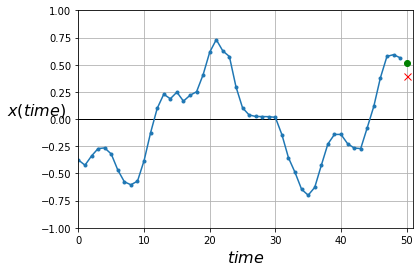

<Figure size 864x288 with 0 Axes>

In [18]:
y_pred = model.predict(x_valid)
plot_series(x_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

# Deep RNN for a single prediction.
(Returns a series of data)

In [20]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
        keras.layers.SimpleRNN(20,return_sequences=True, input_shape=[None,1]),
        keras.layers.SimpleRNN(20, return_sequences=True),
        keras.layers.SimpleRNN(1)       
])
optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss='mse',optimizer=optimizer)
model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 37s 5ms/step - loss: 0.0215 - val_loss: 0.0043
Epoch 2/20
7000/7000 [==============================] - 36s 5ms/step - loss: 0.0054 - val_loss: 0.0044
Epoch 3/20
7000/7000 [==============================] - 36s 5ms/step - loss: 0.0039 - val_loss: 0.0043
Epoch 4/20
7000/7000 [==============================] - 36s 5ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 5/20
7000/7000 [==============================] - 36s 5ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 6/20
7000/7000 [==============================] - 36s 5ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 7/20
7000/7000 [==============================] - 36s 5ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 8/20
7000/7000 [==============================] - 36s 5ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 9/20
7000/7000 [==============================] - 36s 5ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 10/20
7000/7000 [==

In [22]:
model.evaluate(x_valid, y_valid)

2000/2000 [==============================] - 1s 447us/step


0.0027470316886901856

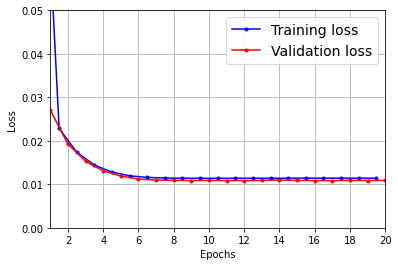

In [23]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

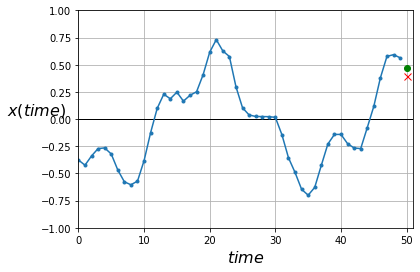

<Figure size 864x288 with 0 Axes>

In [26]:
y_pred = model.predict(x_valid)
plot_series(x_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [27]:
np.random.seed(43) # not 42, as it would give the first series in the train set

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

In [28]:
Y_pred.shape

(1, 10, 1)

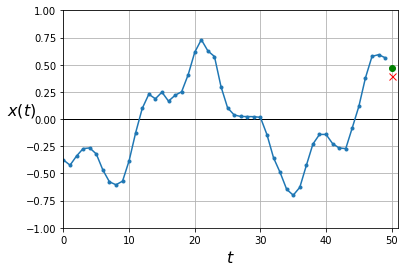

<Figure size 864x288 with 0 Axes>

In [36]:
y_pred = model.predict(x_valid)
plot_series(x_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

# Deep RNN for a single prediction.

(Returns only the last output)

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
        keras.layers.SimpleRNN(20),
        keras.layers.Dense(1)
])

model.compile(loss='mse',optimizer='adam')
model.fit(x_train,y_train,epochs=20,
          validation_data = (x_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 26s 4ms/step - loss: 0.0141 - val_loss: 0.0042
Epoch 2/20
7000/7000 [==============================] - 25s 4ms/step - loss: 0.0039 - val_loss: 0.0041
Epoch 3/20
7000/7000 [==============================] - 25s 4ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 4/20
7000/7000 [==============================] - 25s 4ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 5/20
7000/7000 [==============================] - 25s 4ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 6/20
7000/7000 [==============================] - 25s 4ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 7/20
7000/7000 [==============================] - 25s 4ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 8/20
7000/7000 [==============================] - 25s 4ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 9/20
7000/7000 [==============================] - 25s 4ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/20
7000/7000 [==

In [43]:
model.evaluate(x_valid, y_valid)

2000/2000 [==============================] - 1s 328us/step


0.002464158425107598

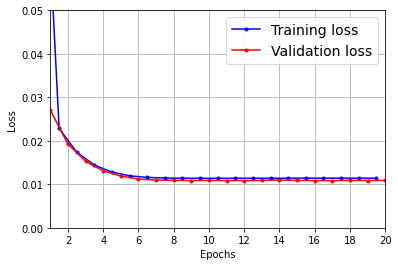

In [44]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

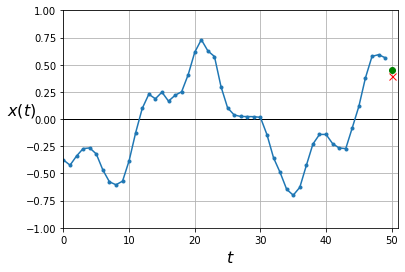

<Figure size 864x288 with 0 Axes>

In [46]:
y_pred = model.predict(x_valid)
plot_series(x_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()